# Q. 7 Un premier code "intuitif"

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
# Paramètres du problème
Lx = 1.0 # Longueur du domaine en x
T_max = 2 # Temps total
precision=1e-12 #critere de convergence
dt_Disp=0.1 # Nombre de points temporels avant affichage
Nx = 60 # Nombre de points spatiaux en x
Ny = 30 # Nombre de points spatiaux en y
Pe = 1000 # Pe
nLy=4
Ly = nLy/np.sqrt(Pe) # Longueur du domaine en y
dx = Lx / Nx
dy = Ly / Ny
# pas de temps
dt= 5e-3
Ndisp= int(np.ceil(dt_Disp/dt)) # Nombre d'itérations entre deux affichages
Nt=round(T_max/dt) # Nombre d'itérations max
# Initialisation de la grille
x = np.linspace(dx/2, Lx-dx/2, Nx) # vecteur x (cell centered)
y = np.linspace(dy/2, Ly-dy/2, Ny) #vecteur x (cell centered)
X, Y = np.meshgrid(x, y) # matrices des positions x et y
u = np.zeros((Nx, Ny)) # matrice resultat
res = np.zeros(Nt) # vecteur permettant de stocker les residus à chaque itération
Nu=np.zeros(Nt) # vecteur permettant de stocker le Nu a chaque iteration
x_full=np.concatenate((np.array([0]),x,np.array([1]))) # x incluant les frontières (pour calcul de Nu).
# Conditions initiales
u[:,:] = 0
# Schema numerique
for n in range(Nt):
    u_new = u.copy()
    for i in range(0, Nx):
        for j in range(0, Ny ):
            if j<Ny-1:
                fN=dx/dy/Pe*(u[i,j+1]-u[i,j])
            else:
                fN=0
            if j>0:
                fS=dx/dy/Pe*(u[i,j-1]-u[i,j])
            else:
                fS = 2*dx/dy/ Pe * (1 - u[i, j])
            if i == 0:
                fE = 2*dy/dx/Pe*(-u[i,j])
            else:
                fE=dy*u[i-1,j] + dy/dx/Pe*(u[i-1,j]-u[i,j])
            if i<Nx-1:
                fW=-dy*u[i,j] + dy/dx/Pe*(u[i+1,j]-u[i,j])
            else:
                fW=-dy*u[i,j]
            u_new[i, j] = u[i, j] + dt/(dx*dy)*(fN+fS+fW+fE)
    res[n]=np.sqrt(np.mean((u-u_new)**2))
    u=u_new
    u0_full=np.concatenate((np.array([u[0,0]]),u[:,0],np.array([u[-1,0]])))
    Nu[n]=-np.trapz(2*(u0_full-1)/dy,x_full)
    
    # affichage des iterations
    if (n>0 and n % Ndisp == 0):
        print('it %g, t=%g, residu=%g, Nu=%g' % (n, n*dt, res[n], Nu[n]))
        # test de la convergence
    if (n>Ndisp and abs(Nu[n]-Nu[n-1])/Nu[n]<precision) :
        print('Convergence is reached')
        break
Nu=Nu[Nu>0] # supprime les éléments en trop du vecteur Nu
res=res[res>0] # supprime les éléments en trop du vecteur res

it 20, t=0.1, residu=0.00408877, Nu=60.6029
it 40, t=0.2, residu=0.00229191, Nu=47.5712
it 60, t=0.3, residu=0.00157257, Nu=42.3457
it 80, t=0.4, residu=0.00116275, Nu=39.6238
it 100, t=0.5, residu=0.000885971, Nu=38.048
it 120, t=0.6, residu=0.000677017, Nu=37.0971
it 140, t=0.7, residu=0.000503834, Nu=36.5249
it 160, t=0.8, residu=0.000346595, Nu=36.1983
it 180, t=0.9, residu=0.000200656, Nu=36.0344
it 200, t=1, residu=8.79869e-05, Nu=35.9682
it 220, t=1.1, residu=2.75832e-05, Nu=35.9481
it 240, t=1.2, residu=6.17722e-06, Nu=35.9436
it 260, t=1.3, residu=1.01808e-06, Nu=35.9428
it 280, t=1.4, residu=1.28334e-07, Nu=35.9427
it 300, t=1.5, residu=1.28443e-08, Nu=35.9427
it 320, t=1.6, residu=1.05489e-09, Nu=35.9427
it 340, t=1.7, residu=7.31162e-11, Nu=35.9427
Convergence is reached


In [317]:
Nu_th(1000)

35.682482323055424

# Q8

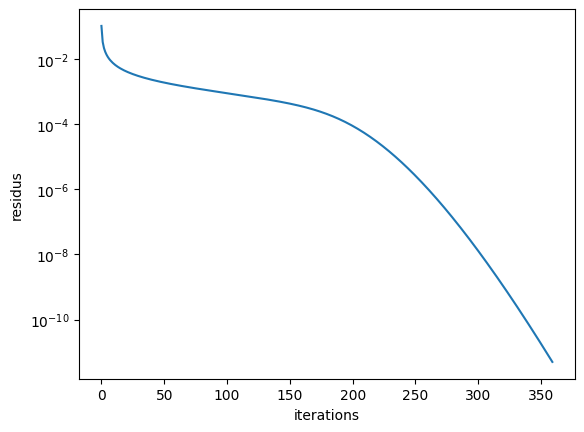

In [305]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.semilogy(res)
ax.set_xlabel('iterations')
ax.set_ylabel('residus')
plt.show()

# Q9

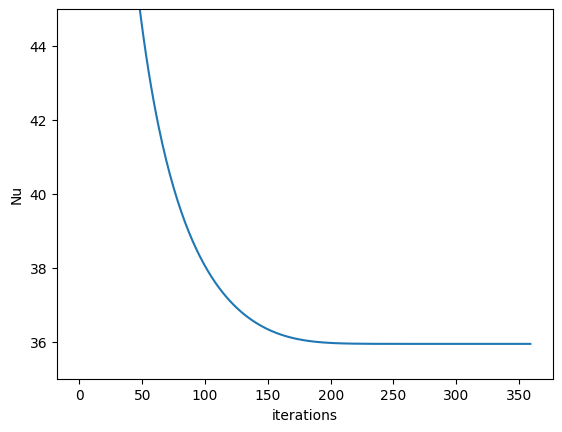

In [306]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(Nu)
plt.ylim((35, 45))
ax.set_xlabel('iterations')
ax.set_ylabel('Nu')
plt.show()

# Q10

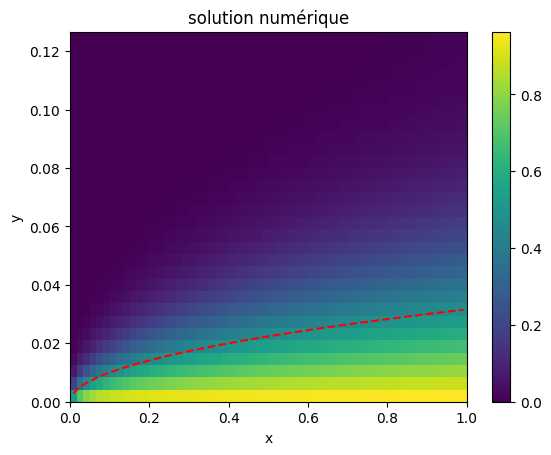

In [307]:
fig = plt.figure()
ax = fig.add_subplot(111)
im=ax.imshow(u.T, origin='lower',aspect='auto',extent=(0,1,0,Ly))
ax.plot(x,np.sqrt(x/Pe),'r--')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(im)
ax.set_title('solution numérique')
plt.show()

# Q11

In [321]:
print( np.abs(2*np.sqrt(Pe/np.pi)-Nu[-1])/(2*np.sqrt(Pe/np.pi)))

0.00729356663181776


# Q12

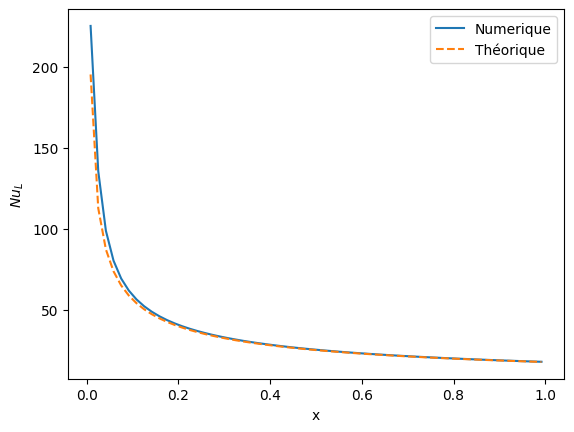

In [224]:
plt.plot(x,-2*(u[range(Nx),0]-1)/dy)
plt.plot(x,np.sqrt(Pe/x/np.pi),'--' )
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('$Nu_L$')
plt.legend(['Numerique','Théorique'])
plt.show()

# Q13

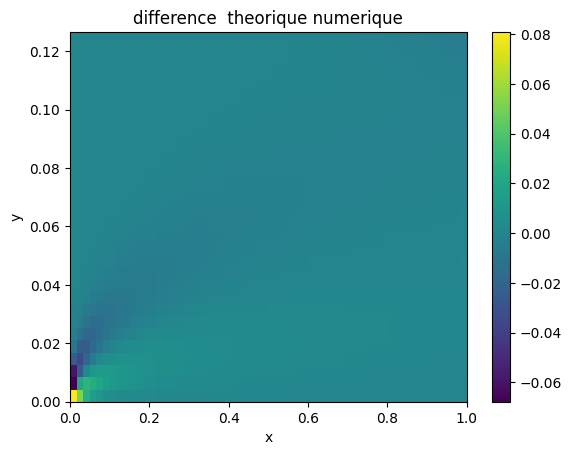

In [225]:
#solution theorique
u_theo=1-special.erf(Y/(np.sqrt(4*X/Pe)))
fig = plt.figure()
ax = fig.add_subplot(111)
im=ax.imshow(u_theo-u.T, origin='lower',aspect='auto',extent=(0,1,0,Ly))
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(im)
ax.set_title('difference  theorique numerique')
plt.show()

Pour aller plus loin, il faut gagner en temps de calcul afin de pouvoir étudier des maillages plus fins. Pour ce faire, il faut utiliser les possibilités de calcul matriciel de Python. Au lieu de faire des boucles spatiales, on va définir une matrice et l'utiliser ensuite pour calculer itérativement la solution. Au passage, on transforme en fonction le code, pour plus de versalité. 

# Q14

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import sparse

def Nu_th(Pe=1000):
    return 2*np.sqrt(Pe/np.pi)

def coucheLimite(Nx=60,Ny=30,Pe=1000,nLy=4,diffx=1,display=1,dt=0,dt_Disp=0.1, precision=1e-12, T_max=2, coef_stab_c=0.3, coef_stab_d=0.3):
    ### ARGUMENTS ###
    # Nx : nombre de points en x
    # Ny : nombre de points en y
    # Pe : nombre de Peclet
    # nLy : prefacteur permettant de dimensionner la taille du domaine en y : Ly = nLy/sqrt(Pe)
    # diffx : diffusion suivant x (si 1) ou non (si 0)
    # display : affichage de graphiques si display = 2, des iterations si display = 1, de rien du tout si display = 0
    # dt_Disp : pas de temps pour l'affichage des iterations
    # precision : limite en precision pour arreter la convergernce 
    # T_max : temps maximum de la simulation
    # coef_stab_c : coefficient pour la stabilité par rapport à la convection
    # coef_stab_d : coefficient pour la stabilité par rapport à la diffusion
    
    # Taille du domaine et pas d'espace
    Lx = 1.0  # Longueur du domaine en x
    Ly = nLy/np.sqrt(Pe)
    dx = Lx / Nx 
    dy = Ly / Ny

    #Pas de temps
    if dt==0: # pas de temps déterminé automatiquement (conditions CFL) 
        dt_c = coef_stab_c*dx
        dt_d= coef_stab_d*Pe/(1/dy**2+1/dx**2)
        if display>0 :
            print('dt_c', dt_c,'dt_d',dt_d)
        dt = min(dt_c,dt_d)
    Ndisp=int(np.ceil(dt_Disp/dt))
    Nt=round(T_max/dt)
    
    # Initialisation du maillage
    x = np.linspace(dx/2, Lx-dx/2, Nx)
    y = np.linspace(dy/2, Ly-dy/2, Ny)
    X, Y = np.meshgrid(x, y)
    u = np.zeros((Nx, Ny))
    x_full=np.concatenate((np.array([0]),x,np.array([1]))) # utile pour le calcul de Nu

    #initialisation de vecteurs residus et Nusselt
    res = np.zeros(Nt)
    Nu=np.zeros(Nt)

    # Conditions initiales
    u[:,:] = 0

    #construction de la matrice
    if display>0:
        print('construction de la matrice')
    mat= sparse.lil_matrix((Nx*Ny, Nx*Ny)) # on utilise des matrices creuses pour ne pas avoir de problèmes de mémoire et pour gagner en temps de calcul
    source=np.zeros(int(Nx*Ny))
    for i in range(0, Nx):
        for j in range(0, Ny):
            finds=np.ravel_multi_index(np.array([[i,i,i,i+1,i-1],[j,j-1,j+1,j,j]]),(Nx,Ny),mode='clip')
            k=finds[0]
            #flux Top
            if j < Ny - 1:
                mat[k,k] +=  -dx / dy / Pe
                mat[k,finds[2]] += dx / dy / Pe
            #flux bottom
            if j > 0:
                mat[k,k] += -dx / dy / Pe
                mat[k,finds[1]] += +dx / dy / Pe
            else:
                mat[k, k] += -2*dx / dy / Pe
                source[k] += 2 * dx / dy / Pe
            if i > 0:
                mat[k,finds[4]] += dy + diffx*dy/dx/Pe
                mat[k,k] += -diffx*dy/dx/Pe
            else:  
                mat[k,k] += -diffx * 2 * dy / dx / Pe
            if i < Nx - 1:
                mat[k, k] += -dy -diffx*dy/dx/Pe
                mat[k,finds[3]] += diffx*dy/dx/Pe
            else:  
                mat[k, k] += -dy

    mat=sparse.eye(Nx*Ny)+mat*dt/(dx*dy)
    mat=mat.tocsr() # conversion du type de matrice creuse, pour gagner en temps de calcul
    source=source*dt/(dx*dy)
    if display>0:
        print('debut des iterations')

    for n in range(0,Nt):
        u_new = mat.dot(u.reshape(Nx*Ny))  + source 
        #redimensionnement de la solution
        u_new=u_new.reshape((Nx,Ny))
        #calcul des résidus
        res[n]=np.sqrt(np.mean((u-u_new)**2))
        u = u_new
        # calcul du nombre de Nusselt
        u0_full=np.concatenate((np.array([u[0,0]]),u[:,0],np.array([u[-1,0]])))
        Nu[n]=-np.trapz(2*(u0_full-1)/dy,x_full)
        
        #affichage des iterations
        if (display>0 and n>0 and n % Ndisp == 0):
            print('it %g, t=%g, residu=%g, Nu=%g' % (n, n*dt, res[n], Nu[n]))
        # test de la convergence
        if (n>Ndisp and abs(Nu[n]-Nu[n-1])/Nu[n]<precision):
            if display>0:
                print('Convergence is reached')
            break

    uu=1-special.erf(Y/(np.sqrt(4*X/Pe)))
    err=sum(sum(abs(uu-u.T)))/(sum(sum(abs(uu))))
    if display>0:
        print('erreur : %g' % err)
    Nu=Nu[Nu>0]
    res=res[res>0]
    Nuf=Nu[-1]
    
    if display>1:
        fig = plt.figure(1,figsize=(12,3))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
                
        ax1.semilogy(res)
        ax1.set_xlabel('iterations')
        ax1.set_ylabel('residus')
         
        ax2.plot(Nu)
        ax2.set_xlabel('iterations')
        ax2.set_ylabel('Nu')
    
        im=ax3.imshow(u.T, origin='lower',aspect='auto',extent=(0,1,0,Ly))
        ax3.plot(x,np.sqrt(x/Pe),'r--')
        ax3.set_xlabel('x')
        ax3.set_ylabel('y')
        ax3.set_title('solution')
        plt.colorbar(im)
        

    return err, x, y, u, dy, dx, Nuf, res

# Q15

In [230]:
err, x, y, u, dy, dx, Nuf, res =coucheLimite(Nx=60,Ny=30,Pe=1000,dt_Disp=0.1, display=1,dt=0.005)

construction de la matrice
debut des iterations
it 20, t=0.1, residu=0.00408877, Nu=60.6029
it 40, t=0.2, residu=0.00229191, Nu=47.5712
it 60, t=0.3, residu=0.00157257, Nu=42.3457
it 80, t=0.4, residu=0.00116275, Nu=39.6238
it 100, t=0.5, residu=0.000885971, Nu=38.048
it 120, t=0.6, residu=0.000677017, Nu=37.0971
it 140, t=0.7, residu=0.000503834, Nu=36.5249
it 160, t=0.8, residu=0.000346595, Nu=36.1983
it 180, t=0.9, residu=0.000200656, Nu=36.0344
it 200, t=1, residu=8.79869e-05, Nu=35.9682
it 220, t=1.1, residu=2.75832e-05, Nu=35.9481
it 240, t=1.2, residu=6.17722e-06, Nu=35.9436
it 260, t=1.3, residu=1.01808e-06, Nu=35.9428
it 280, t=1.4, residu=1.28334e-07, Nu=35.9427
it 300, t=1.5, residu=1.28443e-08, Nu=35.9427
it 320, t=1.6, residu=1.05489e-09, Nu=35.9427
it 340, t=1.7, residu=7.31162e-11, Nu=35.9427
Convergence is reached
erreur : 0.0107718


Effectivement, ils sont parfaitement équivalent, mais le deuxième est beaucoup plus rapide. Cela sera encore plus flagrant sur les maillages plus fins. 
Afin d'optimiser le temps de calcul, on va essayer également de trouver le pas de temps optimal. Puisqu'on s'intéresse à la solution stationnaire, le pas de temps ne devrait pas avoir d'impact sur la précision. Vérifions-le.  

# Q16

In [232]:
print('dt=0.005')
err, x, y, u, dy, dx, Nuf, res =coucheLimite(Nx=60,Ny=30,Pe=1000,dt_Disp=0.5, display=1,dt=0.005)
print('dt=0.00005')
err, x, y, u, dy, dx, Nuf, res =coucheLimite(Nx=60,Ny=30,Pe=1000,dt_Disp=0.5,display=1,dt=0.00005)

dt=0.005
construction de la matrice
debut des iterations
it 100, t=0.5, residu=0.000885971, Nu=38.048
it 200, t=1, residu=8.79869e-05, Nu=35.9682
it 300, t=1.5, residu=1.28443e-08, Nu=35.9427
Convergence is reached
erreur : 0.0107718
dt=0.00005
construction de la matrice
debut des iterations
it 10000, t=0.5, residu=8.86147e-06, Nu=38.1866
it 20000, t=1, residu=9.96237e-07, Nu=35.982
it 30000, t=1.5, residu=7.1882e-10, Nu=35.9427
Convergence is reached
erreur : 0.0107718


On obtient exactement le meme nombre de Nu, mais avec environ 100 fois plus d'itérations
Par contre, si on augmente trop le pas de temps, cela devient instable, les résidus augmentent au lieu de diminuer ...

# Q17

construction de la matrice
debut des iterations
it 2, t=0.016, residu=0.0694008, Nu=59.0341
it 4, t=0.032, residu=0.0623315, Nu=62.0983
it 6, t=0.048, residu=0.140712, Nu=61.7049
it 8, t=0.064, residu=0.417329, Nu=59.6082
it 10, t=0.08, residu=1.30155, Nu=56.3376
it 12, t=0.096, residu=4.15618, Nu=51.6353
it 14, t=0.112, residu=13.48, Nu=44.3143
it 16, t=0.128, residu=44.2145, Nu=31.5457
it 18, t=0.144, residu=146.26, Nu=7.12271
it 20, t=0.16, residu=487.047, Nu=-42.4428
Convergence is reached
erreur : 251.324


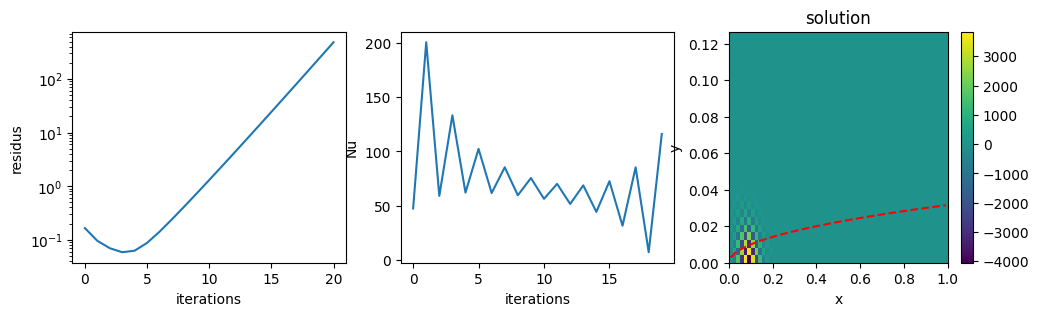

In [233]:
err, x, y, u, dy, dx, Nuf, res =coucheLimite(Nx=60,Ny=30,Pe=1000,display=2,dt_Disp=0.01, dt=0.008)

construction de la matrice
debut des iterations
it 2, t=0.0112, residu=0.0225706, Nu=130.519
it 4, t=0.0224, residu=0.0141214, Nu=105.713
it 6, t=0.0336, residu=0.0106393, Nu=91.3764
it 8, t=0.0448, residu=0.00865463, Nu=81.9742
it 10, t=0.056, residu=0.00735425, Nu=75.2501
it 12, t=0.0672, residu=0.00642858, Nu=70.1573
it 14, t=0.0784, residu=0.00573222, Nu=66.1426
it 16, t=0.0896, residu=0.00518731, Nu=62.8832
it 18, t=0.1008, residu=0.00474816, Nu=60.1765
it 20, t=0.112, residu=0.00438605, Nu=57.8883
it 22, t=0.1232, residu=0.004082, Nu=55.9259
it 24, t=0.1344, residu=0.00382293, Nu=54.2226
it 26, t=0.1456, residu=0.0035995, Nu=52.7293
it 28, t=0.1568, residu=0.00340486, Nu=51.409
it 30, t=0.168, residu=0.00323387, Nu=50.2331
it 32, t=0.1792, residu=0.00308258, Nu=49.1791
it 34, t=0.1904, residu=0.00294793, Nu=48.229
it 36, t=0.2016, residu=0.00282748, Nu=47.3685
it 38, t=0.2128, residu=0.00271927, Nu=46.5857
it 40, t=0.224, residu=0.00262173, Nu=45.8708
it 42, t=0.2352, residu=0.00

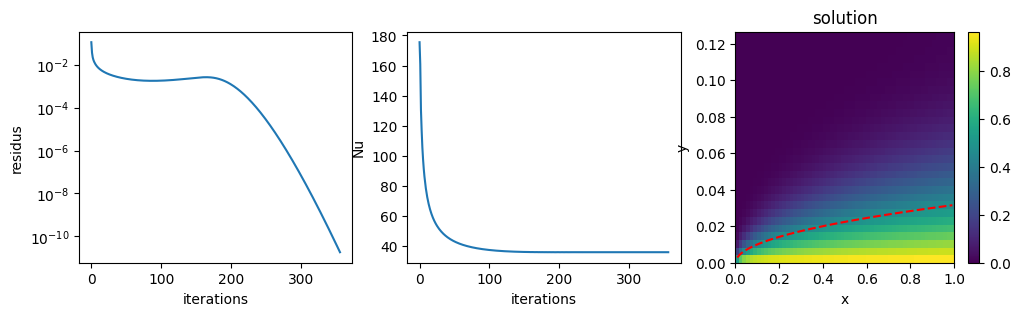

In [238]:
err, x, y, u, dy, dx, Nuf, res =coucheLimite(Nx=60,Ny=30,Pe=1000,display=2,dt_Disp=0.01, dt=0.0056)

Le dt max est d'environ 0.0056

# Q18

dt_c 0.004125 dt_d 0.015600624024960999
construction de la matrice
debut des iterations
it 25, t=0.103125, residu=0.00335199, Nu=191.332
it 50, t=0.20625, residu=0.00186333, Nu=148.705
it 75, t=0.309375, residu=0.00127381, Nu=132.07
it 100, t=0.4125, residu=0.000938952, Nu=123.528
it 125, t=0.515625, residu=0.000712871, Nu=118.644
it 150, t=0.61875, residu=0.000541881, Nu=115.74
it 175, t=0.721875, residu=0.000399392, Nu=114.029
it 200, t=0.825, residu=0.000267048, Nu=113.09
it 225, t=0.928125, residu=0.000137882, Nu=112.661
it 250, t=1.03125, residu=4.3696e-05, Nu=112.525
it 275, t=1.13438, residu=7.40876e-06, Nu=112.499
it 300, t=1.2375, residu=6.68157e-07, Nu=112.496
it 325, t=1.34062, residu=3.3921e-08, Nu=112.496
it 350, t=1.44375, residu=1.04023e-09, Nu=112.496
it 375, t=1.54688, residu=2.05901e-11, Nu=112.496
Convergence is reached
erreur : 0.0105335


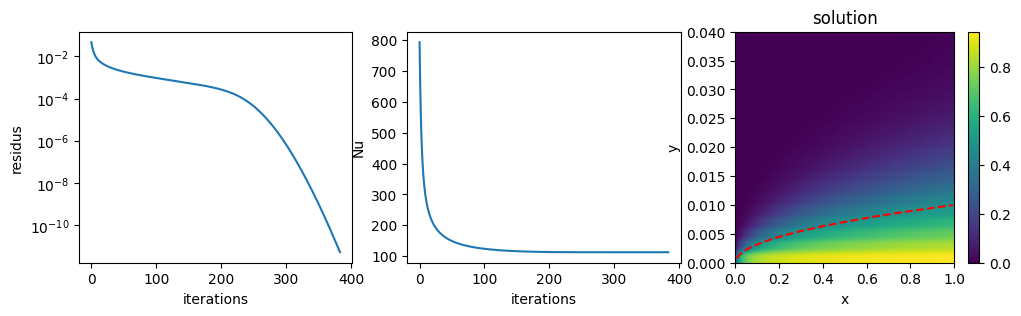

In [286]:
err, x, y, u, dy, dx, Nuf, res =coucheLimite(Nx=80,Ny=20,Pe=10000,display=2,coef_stab_c=0.33, coef_stab_d=0.4)

# Q19

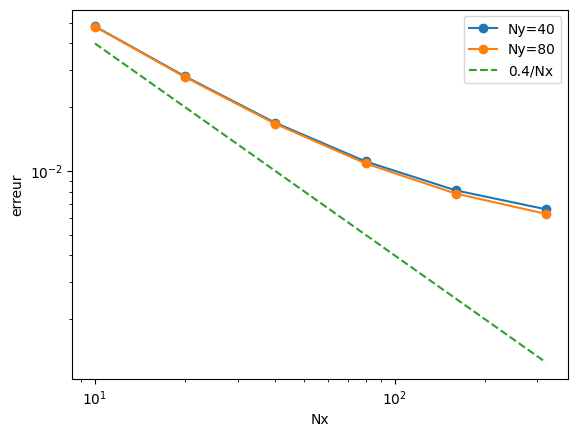

In [288]:

Ny = np.array([40, 80])
Nx = np.array([10, 20, 40, 80, 160, 320])
nLy = 3
err = np.zeros((Nx.size, Ny.size))
Nuf = np.zeros((Nx.size, Ny.size))

fig = plt.figure()
for j in range(Ny.size):
    for i in range(Nx.size):
        err[i, j], x, y, u, dy, dx, Nuf[i, j], res = coucheLimite(Nx=int(Nx[i]), Ny=int(Ny[j]), nLy=nLy, Pe=1000,diffx=0, display=0, dt_Disp=0.2)
    plt.loglog(Nx, err[:, j], marker='o', label='Ny=%g' % Ny[j])
plt.loglog(Nx, 0.4 / Nx,'--' ,label='0.4/Nx')
plt.gca().set_xlabel('Nx')
plt.gca().set_ylabel('erreur')
plt.gca().legend()
plt.show()


# Q20

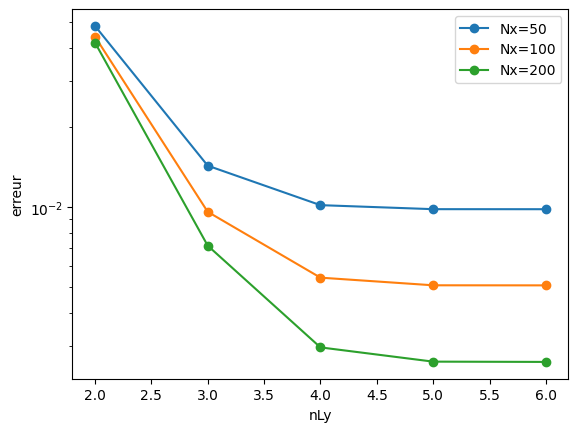

In [289]:
Nx=np.array([50,100,200]) #,1280])
nLy=np.array([2, 3, 4, 5, 6])
err_L = np.zeros([Nx.size,nLy.size])
Nuf_L = np.zeros([Nx.size,nLy.size])

for i in range(nLy.size):
    for j in range(Nx.size):
        Ny=200
        err_L[j,i], x, y, u, dy, dx, Nuf_L[j,i], res=coucheLimite(Nx=int(Nx[j]),Ny=int(Ny),nLy=nLy[i],Pe=1000,diffx=0, display=0,dt_Disp=0.2)

for i in range(Nx.size) :
    plt.semilogy(nLy,err_L[i,:],marker='o',label='Nx=%g' % Nx[i])
plt.gca().set_xlabel('nLy')
plt.gca().set_ylabel('erreur')
plt.gca().legend()
plt.show()

# Q21

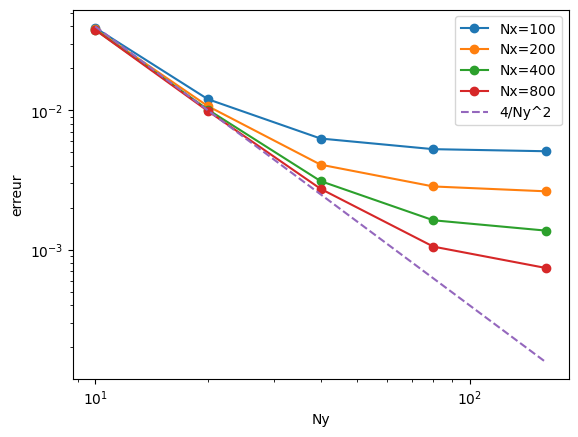

In [290]:
Ny=np.array([10,20,40,80,160])
Nx=np.array([100, 200,400,800])
nLy=5
err = np.zeros((Nx.size,Ny.size))
Nuf = np.zeros((Nx.size,Ny.size))

fig = plt.figure()
for i in range(Nx.size):
    for j in range(Ny.size):
        err[i,j], x, y, u, dy, dx, Nuf[i,j], res=coucheLimite(Nx=int(Nx[i]),Ny=int(Ny[j]),nLy=nLy,Pe=1000,diffx=0, display=0,dt_Disp=0.2)
    plt.loglog(Ny,err[i,:].T,marker='o',label='Nx=%g' % Nx[i])

plt.loglog(Ny,4/np.power(Ny,2),'--',label='4/Ny^2') 
plt.gca().set_xlabel('Ny')
plt.gca().set_ylabel('erreur')
plt.gca().legend()
plt.show()

On constate que l'on obtient bien un ordre 2 en y, mais l'erreur est rapidement dominée par celle en x   

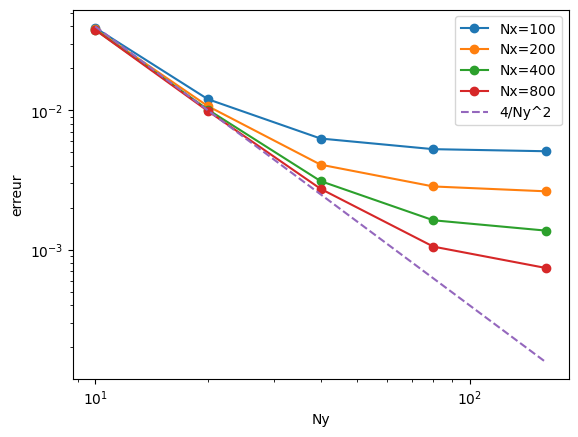

In [315]:
Ny=np.array([10,20,40,80,160])
Nx=np.array([100, 200,400,800])
nLy=5
Pe=1000
err = np.zeros((Nx.size,Ny.size))
Nuf = np.zeros((Nx.size,Ny.size))

fig = plt.figure()
for i in range(Nx.size):
    for j in range(Ny.size):
        err[i,j], x, y, u, dy, dx, Nuf[i,j], res=coucheLimite(Nx=int(Nx[i]),Ny=int(Ny[j]),nLy=nLy,Pe=Pe,diffx=0, display=0,dt_Disp=0.2)
    plt.loglog(Ny,err[i,:].T,marker='o',label='Nx=%g' % Nx[i])


plt.loglog(Ny,4/np.power(Ny,2),'--',label='4/Ny^2') 
plt.gca().set_xlabel('Ny')
plt.gca().set_ylabel('erreur')
plt.gca().legend()
plt.show()

De manière intéressante, l'erreur ne dépend pas de Pe ! Cela vient du fait que l'on change la taille du domaine quand on change le Pe. Exprimée en Ny, l'erreur de troncature ne dépend pas de Pe !

# Q22

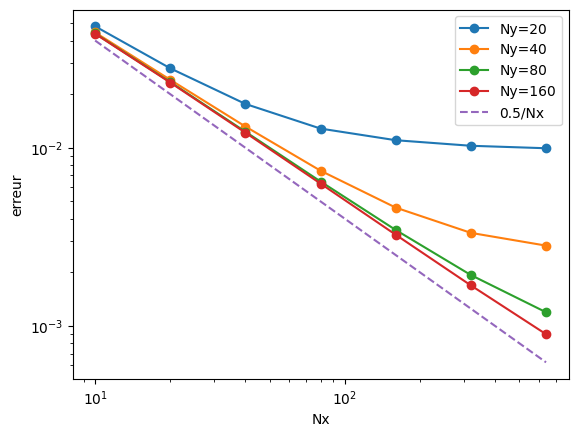

In [291]:
Ny=np.array([20, 40, 80,160])
Nx=np.array([10,20,40,80,160,320,640])
nLy=5
err = np.zeros((Nx.size,Ny.size))
Nuf = np.zeros((Nx.size,Ny.size))

fig = plt.figure()
for j in range(Ny.size):
    for i in range(Nx.size):
        err[i,j], x, y, u, dy, dx, Nuf[i,j], res=coucheLimite(Nx=int(Nx[i]),Ny=int(Ny[j]),nLy=nLy,Pe=1000,diffx=0, display=0,dt_Disp=0.2)
    plt.loglog(Nx,err[:,j],marker='o',label='Ny=%g' % Ny[j])

plt.loglog(Nx,0.4/Nx,'--',label='0.5/Nx') 
plt.gca().set_xlabel('Nx')
plt.gca().set_ylabel('erreur')
plt.gca().legend()
plt.show()


On constate que l'on a bien un ordre 1 en x.
Pour ce cas, on trouve donc une erreur de l'ordre de 4/Ny^2 + 0.4/Nx. Ainsi, si on cherche un optimal pour l'anisitropie des cellules, on peut choisir Ny = sqrt(10/Nx)   

# Q24

Nx=40
Elapsed time is 0.05379629135131836 seconds.
Nx=80
Elapsed time is 0.10793328285217285 seconds.
Nx=160
Elapsed time is 0.30124545097351074 seconds.
Nx=320
Elapsed time is 1.0405182838439941 seconds.
Nx=640
Elapsed time is 4.473081350326538 seconds.
Nx=1280
Elapsed time is 32.84733510017395 seconds.
Nx=2560
Elapsed time is 252.0360221862793 seconds.


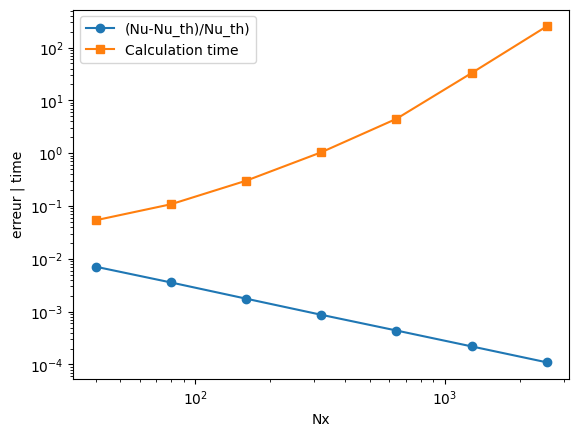

In [97]:
def tic():
    # Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        total_time=time.time() - startTime_for_tictoc
        print("Elapsed time is " + str(total_time) + " seconds.")
        return total_time
    else:
        print("Toc: start time not set")
        return 0


Nx=np.array([40,80,160,320,640,1280,2560])
Ny=np.round(np.sqrt(10*Nx))
nLy=5
err = np.zeros((Nx.size))
Nuf = np.zeros((Nx.size))
calc_time = np.zeros((Nx.size))

fig = plt.figure()
for i in range(Nx.size):
    print('Nx=%g' % Nx[i])
    tic()
    err[i], x, y, u, dy, dx, Nuf[i], res=coucheLimite(Nx=int(Nx[i]),Ny=int(Ny[i]),nLy=nLy,Pe=1000,diffx=0, display=0,dt_Disp=0.2)
    calc_time[i]=toc()

plt.loglog(Nx,abs(Nuf-Nu_th(1000))/Nu_th(1000),marker='o',label='(Nu-Nu_th)/Nu_th)') 
plt.loglog(Nx,calc_time, marker='s',label='Calculation time') 

plt.gca().set_xlabel('Nx')
plt.gca().set_ylabel('erreur | time')
plt.gca().legend()
plt.show()

On remarque que l'erreur diminue en 1/x, mais le temps de calcul augmente lui plus fortement... Les calculs précis sont très très coûteux !! 

# PRECISION EN l'ABSENCE DE SOLUTION EXACTE



# Q25



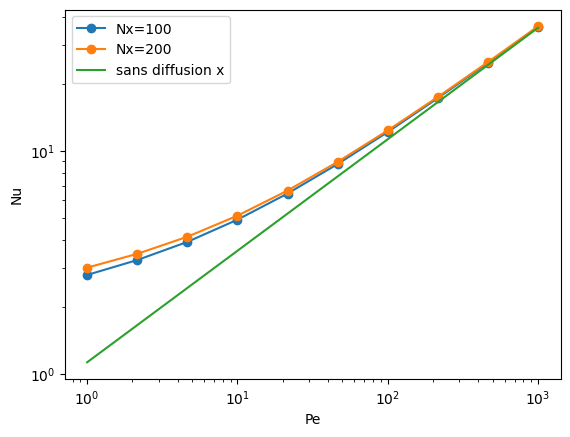

In [292]:
Pe=np.logspace(0,3,10)
Nx=np.array([100,200])
nLy=5
err = np.zeros((Nx.size,Pe.size))
Nuf = np.zeros((Nx.size,Pe.size))

fig = plt.figure()
for i in range(Nx.size):
    for j in range(Pe.size):
        Ny=np.round(np.sqrt(10*Nx[i]))
        err[i,j], x, y, u, dy, dx, Nuf[i,j], res=coucheLimite(Nx=int(Nx[i]),Ny=int(Ny),nLy=nLy,Pe=Pe[j],diffx=1, display=0,dt_Disp=0.2)
    plt.loglog(Pe,Nuf[i,:],marker='o',label='Nx=%g' % Nx[i])
plt.loglog(Pe,Nu_th(Pe),label='sans diffusion x')
plt.gca().set_xlabel('Pe')
plt.gca().set_ylabel('Nu')
plt.gca().legend()
plt.show()

## Q26

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import sparse


def coucheLimiteEtendue(Nx=60,Ny=30,Pe=1000,nLy=4,diffx=1,display=1,dt=0,dt_Disp=0.1, precision=1e-12, T_max=2, coef_stab_c=0.3, coef_stab_d=0.3,Lr=0.2,Ll=0.2):
    ### ARGUMENTS ###
    # Nx : nombre de points en x
    # Ny : nombre de points en y
    # Pe : nombre de Peclet
    # nLy : prefacteur permettant de dimensionner la taille du domaine en y : Ly = nLy/sqrt(Pe)
    # diffx : diffusion suivant x (si 1) ou non (si 0)
    # display : affichage de graphiques si display = 2, des iterations si display = 1, de rien du tout si display = 0
    # dt_Disp : pas de temps pour l'affichage des iterations
    # precision : limite en precision pour arreter la convergernce 
    # T_max : temps maximum de la simulation
    # coef_stab_c : coefficient pour la stabilité par rapport à la convection
    # coef_stab_d : coefficient pour la stabilité par rapport à la diffusion
    
    # Taille du domaine et pas d'espace

    
    Lx = 1.0+Ll+Lr  # Longueur du domaine en x
    Ly = nLy/np.sqrt(Pe)
    dx = Lx / Nx 
    dy = Ly / Ny

    #Pas de temps
    if dt==0: # pas de temps déterminé automatiquement (conditions CFL) 
        dt_c = coef_stab_c*dx
        dt_d= coef_stab_d*Pe/(1/dy**2+1/dx**2)
        if display>0 :
            print('dt_c', dt_c,'dt_d',dt_d)
        dt = min(dt_c,dt_d)
    Ndisp=int(np.ceil(dt_Disp/dt))
    Nt=round(T_max/dt)
    
    # Initialisation du maillage
    x = np.linspace(dx/2, Lx-dx/2, Nx)-Ll
    y = np.linspace(dy/2, Ly-dy/2, Ny)
    X, Y = np.meshgrid(x, y)
    u = np.zeros((Nx, Ny))
   
    #initialisation de vecteurs residus et Nusselt
    res = np.zeros(Nt)
    Nu=np.zeros(Nt)

    xplaque=np.nonzero((x>=0) & (x<1))[0]
    x_full=np.concatenate((np.array([0]),x[xplaque],np.array([1])))
   
    # Conditions initiales
    u[:,:] = 0

    #construction de la matrice
    if display>0:
        print('construction de la matrice')
    mat= sparse.lil_matrix((Nx*Ny, Nx*Ny)) # on utilise des matrices creuses pour ne pas avoir de problèmes de mémoire et pour gagner en temps de calcul
    source=np.zeros(int(Nx*Ny))
    for i in range(0, Nx):
        for j in range(0, Ny):
            finds=np.ravel_multi_index(np.array([[i,i,i,i+1,i-1],[j,j-1,j+1,j,j]]),(Nx,Ny),mode='clip')
            k=finds[0]
            #flux Top
            if j < Ny - 1:
                #  fTop=dx/dy/Pe*(u[i,j+1]-u[i,j]) fTop=dx/dy/Pe*(u[i,j+1]-u[i,j])
                mat[k,k] +=  -dx / dy / Pe
                mat[k,finds[2]] += dx / dy / Pe
            else:
                fTop = 0
            #flux bottom
            if j > 0:
                # fBottom=dx/dy/Pe*(u[i,j-1]-u[i,j])
                mat[k,k] += -dx / dy / Pe
                mat[k,finds[1]] += +dx / dy / Pe
            else:
                #fBottom = 2 * dx / dy / Pe * (1 - u[i, j])
                if x[i]>=0 and x[i]<1:
                    mat[k, k] += -2*dx / dy / Pe
                    source[k] += 2 * dx / dy / Pe
            if i > 0:
                #fLeft = dy / 2 * (u[i - 1, j] * 2) + (1 - diffx) * dy / dx / Pe * (u[i - 1, j] - u[i, j])
                mat[k,finds[4]] += dy + diffx*dy/dx/Pe
                mat[k,k] += -diffx*dy/dx/Pe
            else:  # T nul à gauche
                #fLeft = (1-diffx)*2*dy/dx/Pe*(-u[i,j])
                mat[k,k] += -diffx * 2 * dy / dx / Pe
            if i < Nx - 1:
                #fRight = -dy / 2 * (u[i, j] * 2) + (1 - diffx) * dy / dx / Pe * (u[i + 1, j] - u[i, j])
                mat[k, k] += -dy -diffx*dy/dx/Pe
                mat[k,finds[3]] += diffx*dy/dx/Pe
            else:  # flux diffusif nul
                #fRight = -dy * u[i, j]
                mat[k, k] += -dy

    mat=sparse.eye(Nx*Ny)+mat*dt/(dx*dy)
    mat=mat.tocsr() # conversion du type de matrice creuse, pour gagner en temps de calcul

    source=source*dt/(dx*dy)

    if display>0:
        print('debut des iterations')

    for n in range(0,Nt):
        # shema :
        u_new = mat.dot(u.reshape(Nx*Ny))  + source 
        #redimensionnement de la solution
        u_new=u_new.reshape((Nx,Ny))
        #calcul des résidus
        res[n]=np.mean(abs(u-u_new))
        u = u_new
        # calcul du nombre de Nusselt
        
        u0_full=np.concatenate((np.array([u[xplaque[0],0]]),u[xplaque,0],np.array([u[xplaque[-1],0]])))       
        Nu[n]=-np.trapz(2*(u0_full-1)/dy,x_full)
        #affichage des iterations
        if (display>0 and n>0 and n % Ndisp == 0):
            print('it %g, t=%g, residu=%g, Nu=%g' % (n, n*dt, res[n], Nu[n]))
        # test de la convergence
        if (n>Ndisp and abs(Nu[n]-Nu[n-1])/Nu[n]<precision):
            if display>0:
                print('Convergence is reached')
            break

    uu=1-special.erf(Y[:,xplaque]/(np.sqrt(4*X[:,xplaque]/Pe)))
    err=sum(sum(np.sqrt((uu.T-u[xplaque,:])**2)))/sum(sum(abs(uu)))
    if display>0:
        print('erreur : %g' % err)
    Nu=Nu[Nu>0]
    res=res[res>0]
    Nuf=Nu[-1]
    
    if display>1:
        fig = plt.figure(1,figsize=(12,3))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        
        
        ax1.semilogy(res)
        ax1.set_xlabel('iterations')
        ax1.set_ylabel('residus')
         
        ax2.plot(Nu)
        ax2.set_xlabel('iterations')
        ax2.set_ylabel('Nu')
    
        im=ax3.imshow(u.T, origin='lower',aspect='auto',extent=(0,1,0,Ly))
        ax3.plot(x,np.sqrt(x/Pe),'r--')
        ax3.set_xlabel('x')
        ax3.set_ylabel('y')
        ax3.set_title('solution')
        plt.colorbar(im)
        plt.show()

    return err, x, y, u, dy, dx, Nuf, res

5.8516472707011005
3.622628640852672


C:\Users\bodigueh\AppData\Local\Temp\ipykernel_10852\3543652851.py:22: RuntimeWarning: invalid value encountered in sqrt
  ax2.plot(x,np.sqrt(x/Pe),'r--')


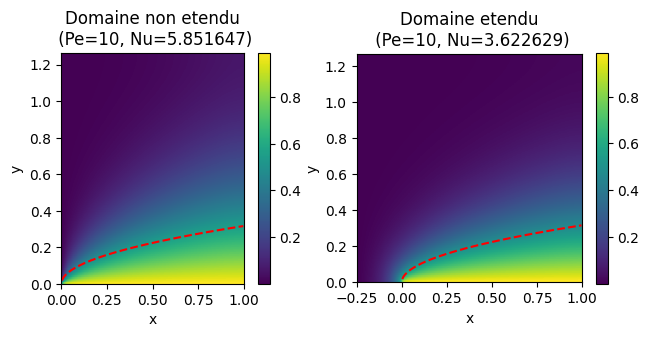

In [139]:
fig = plt.figure(1,figsize=(8,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
Pe=10

err, x, y, u, dy, dx, Nuf, res=coucheLimiteEtendue(Nx=150,Ny=100,Pe=10,diffx=1,display=0,nLy=3,Ll=0, Lr=0)
im=ax1.imshow(u.T, origin='lower',aspect='equal',extent=(0,1,0,4/np.sqrt(Pe)))

ax1.plot(x,np.sqrt(x/Pe),'r--')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Domaine non etendu\n (Pe=10, Nu=%f)' % Nuf)
plt.colorbar(im)

print(Nuf)

err, x, y, u, dy, dx, Nuf, res=coucheLimiteEtendue(Nx=200,Ny=100,Pe=10,diffx=1,display=0,nLy=4,Ll=0.25, Lr=0)

print(Nuf)
im=ax2.imshow(u.T, origin='lower',aspect='equal',extent=(-0.25,1,0,4/np.sqrt(Pe)))

ax2.plot(x,np.sqrt(x/Pe),'r--')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Domaine etendu\n (Pe=10, Nu=%f)' % Nuf)
plt.colorbar(im)

plt.show()


# Q27


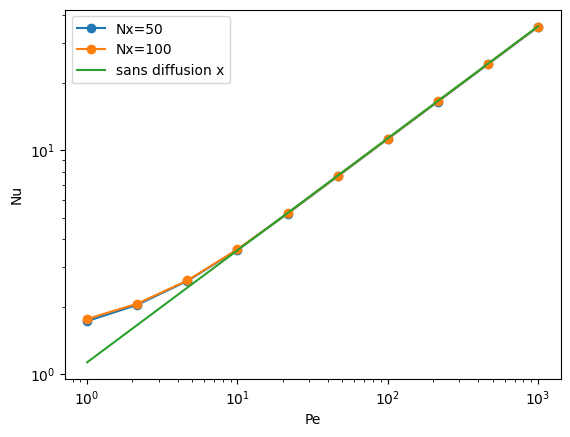

In [293]:
Pe=np.logspace(0,3,10)
Nx=np.array([50,100])
nLy=5
err = np.zeros((Nx.size,Pe.size))
Nuf = np.zeros((Nx.size,Pe.size))

fig = plt.figure()
for i in range(Nx.size):
    for j in range(Pe.size):
        Ny=np.round(np.sqrt(10*Nx[i]))
        err[i,j], x, y, u, dy, dx, Nuf[i,j], res=coucheLimiteEtendue(Nx=int(Nx[i]),Ny=int(Ny),nLy=nLy,Pe=Pe[j],diffx=1, display=0,dt_Disp=0.2,Ll=0.25,Lr=0)
    plt.loglog(Pe,Nuf[i,:],marker='o',label='Nx=%g' % Nx[i])
plt.loglog(Pe,Nu_th(Pe),label='sans diffusion x')
plt.gca().set_xlabel('Pe')
plt.gca().set_ylabel('Nu')
plt.gca().legend()
plt.show()

# Q28

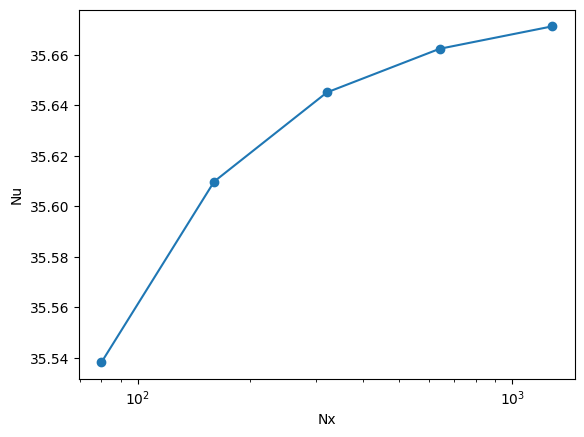

In [295]:

Nx=np.array([80,160,320,640,1280])
cNy=np.array([1])
nLy=5
err = np.zeros((Nx.size,cNy.size))
Nuf = np.zeros((Nx.size,cNy.size))

fig = plt.figure()
for j in range(cNy.size):
    for i in range(Nx.size):
        Ny=cNy[j]*np.round(np.sqrt(10*Nx[i]))
        err[i,j], x, y, u, dy, dx, Nuf[i,j], res=coucheLimiteEtendue(Nx=int(Nx[i]),Ny=int(Ny),nLy=nLy,Pe=1000,diffx=1, display=0,dt_Disp=0.2,Ll=0.25,Lr=0)
    plt.semilogx(Nx,Nuf[:,j],marker='o',label='Ny=%g' % cNy[j])

plt.gca().set_xlabel('Nx')
plt.gca().set_ylabel('Nu')
plt.show()

# Q29

[11.34974274 35.68033881]


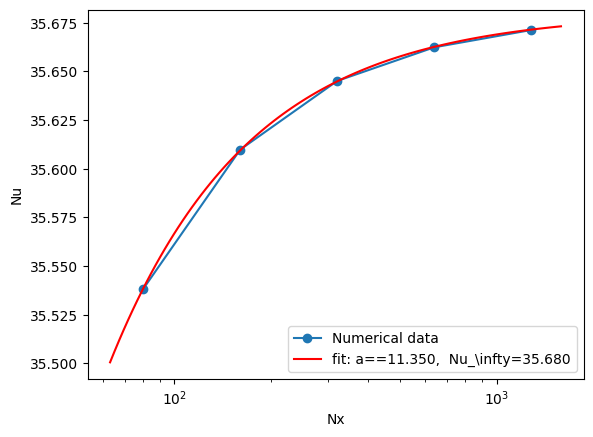

In [296]:
from scipy.optimize import curve_fit
def func(x, a, c):
    return -a*np.power(x,-1)+c

popt, pcov = curve_fit(func, Nx, Nuf[:,0],p0=np.array([5,35]))
print(popt)
xf=np.logspace(1.8,3.2,100)
plt.semilogx(Nx,Nuf[:,0],marker='o',label='Numerical data')
plt.semilogx(xf, func(xf, *popt), 'r-', label='fit: a==%5.3f,  Nu_\infty=%5.3f' % tuple(popt))
plt.legend()
plt.gca().set_xlabel('Nx')
plt.gca().set_ylabel('Nu')
plt.show()


# Le canal à température imposée

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import sparse


def canal(Nx=60,Ny=30,Pe=1000,diffx=1,display=1,dt=0,dt_Disp=0.1, precision=1e-12, T_max=2, coef_stab_c=0.3, coef_stab_d=0.3,Ll=0.2,L=5):
    ### ARGUMENTS ###
    # Nx : nombre de points en x
    # Ny : nombre de points en y
    # Pe : nombre de Peclet
    # nLy : prefacteur permettant de dimensionner la taille du domaine en y : Ly = nLy/sqrt(Pe)
    # diffx : diffusion suivant x (si 1) ou non (si 0)
    # display : affichage de graphiques si display = 2, des iterations si display = 1, de rien du tout si display = 0
    # dt_Disp : pas de temps pour l'affichage des iterations
    # precision : limite en precision pour arreter la convergernce 
    # T_max : temps maximum de la simulation
    # coef_stab_c : coefficient pour la stabilité par rapport à la convection
    # coef_stab_d : coefficient pour la stabilité par rapport à la diffusion
    
    # Taille du domaine et pas d'espace

    
    Lx = L+Ll  # Longueur du domaine en x
    Ly = 1
    dx = Lx / Nx 
    dy = Ly / Ny

    #Pas de temps
    if dt==0: # pas de temps déterminé automatiquement (conditions CFL) 
        dt_c = coef_stab_c*dx
        dt_d= coef_stab_d*Pe/(1/dy**2+1/dx**2)
        if display>0 :
            print('dt_c', dt_c,'dt_d',dt_d)
        dt = min(dt_c,dt_d)
    Ndisp=int(np.ceil(dt_Disp/dt))
    Nt=round(T_max/dt)
    
    # Initialisation du maillage
    x = np.linspace(dx/2, Lx-dx/2, Nx)-Ll
    y = np.linspace(dy/2, Ly-dy/2, Ny)
    X, Y = np.meshgrid(x, y)
    u = np.zeros((Nx, Ny))
   
    #initialisation de vecteurs residus et Nusselt
    res = np.zeros(Nt)
    Nu=np.zeros(Nt)

    xplaque=np.nonzero((x>=0))[0]
    x_full=np.concatenate((np.array([0]),x[xplaque],np.array([1])))
   
    # Conditions initiales
    u[:,:] = 0

    #construction de la matrice
    if display>0:
        print('construction de la matrice')
    mat= sparse.lil_matrix((Nx*Ny, Nx*Ny)) # on utilise des matrices creuses pour ne pas avoir de problèmes de mémoire et pour gagner en temps de calcul
    source=np.zeros(int(Nx*Ny))
    for i in range(0, Nx):
        for j in range(0, Ny):
            finds=np.ravel_multi_index(np.array([[i,i,i,i+1,i-1],[j,j-1,j+1,j,j]]),(Nx,Ny),mode='clip')
            k=finds[0]
            #flux Top
            if j < Ny - 1:
                #  fTop=dx/dy/Pe*(u[i,j+1]-u[i,j]) fTop=dx/dy/Pe*(u[i,j+1]-u[i,j])
                mat[k,k] +=  -dx / dy / Pe
                mat[k,finds[2]] += dx / dy / Pe
            else:
                if x[i]>=0:
                    mat[k, k] += -2*dx / dy / Pe
                    source[k] += 2 * dx / dy / Pe
            #flux bottom
            if j > 0:
                # fBottom=dx/dy/Pe*(u[i,j-1]-u[i,j])
                mat[k,k] += -dx / dy / Pe
                mat[k,finds[1]] += +dx / dy / Pe
            else:
                #fBottom = 2 * dx / dy / Pe * (1 - u[i, j])
                if x[i]>=0:
                    mat[k, k] += -2*dx / dy / Pe
                    source[k] += 2 * dx / dy / Pe
            if i > 0:
                #fLeft = dy / 2 * (u[i - 1, j] * 2) + (1 - diffx) * dy / dx / Pe * (u[i - 1, j] - u[i, j])
                mat[k,finds[4]] += dy + diffx*dy/dx/Pe
                mat[k,k] += -diffx*dy/dx/Pe
            else:  # T nul à gauche
                #fLeft = (1-diffx)*2*dy/dx/Pe*(-u[i,j])
                mat[k,k] += -diffx * 2 * dy / dx / Pe
            if i < Nx - 1:
                #fRight = -dy / 2 * (u[i, j] * 2) + (1 - diffx) * dy / dx / Pe * (u[i + 1, j] - u[i, j])
                mat[k, k] += -dy -diffx*dy/dx/Pe
                mat[k,finds[3]] += diffx*dy/dx/Pe
            else:  # flux diffusif nul
                #fRight = -dy * u[i, j]
                mat[k, k] += -dy

    mat=sparse.eye(Nx*Ny)+mat*dt/(dx*dy)
    mat=mat.tocsr() # conversion du type de matrice creuse, pour gagner en temps de calcul

    source=source*dt/(dx*dy)

    if display>0:
        print('debut des iterations')

    for n in range(0,Nt):
        # shema :
        u_new = mat.dot(u.reshape(Nx*Ny))  + source 
        #redimensionnement de la solution
        u_new=u_new.reshape((Nx,Ny))
        #calcul des résidus
        res[n]=np.mean(abs(u-u_new))
        u = u_new
        # calcul du nombre de Nusselt
        
        u0_full=np.concatenate((np.array([u[xplaque[0],0]]),u[xplaque,0],np.array([u[xplaque[-1],0]])))       
        Nu[n]=-np.trapz(2*(u0_full-1)/dy,x_full)
        #affichage des iterations
        if (display>0 and n>0 and n % Ndisp == 0):
            print('it %g, t=%g, residu=%g, Nu=%g' % (n, n*dt, res[n], Nu[n]))
        # test de la convergence
        if (n>Ndisp and abs(Nu[n]-Nu[n-1])/Nu[n]<precision):
            if display>0:
                print('Convergence is reached')
            break

    uu=1-special.erf(Y[:,xplaque]/(np.sqrt(4*X[:,xplaque]/Pe)))
    err=sum(sum(np.sqrt((uu.T-u[xplaque,:])**2)))/sum(sum(abs(uu)))
    if display>0:
        print('erreur : %g' % err)
    Nu=Nu[Nu>0]
    res=res[res>0]
    Nuf=Nu[-1]
    
    if display>1:
        fig = plt.figure(1,figsize=(12,3))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        
        
        ax1.semilogy(res)
        ax1.set_xlabel('iterations')
        ax1.set_ylabel('residus')
         
        ax2.plot(Nu)
        ax2.set_xlabel('iterations')
        ax2.set_ylabel('Nu')
    
        im=ax3.imshow(u.T, origin='lower',aspect='auto',extent=(0,L,0,Ly))
        
        ax3.set_xlabel('x')
        ax3.set_ylabel('y')
        ax3.set_title('solution (Nu=%.3f)' % Nuf)
        plt.colorbar(im)
        plt.show()
    return err, x, y, u, dy, dx, Nuf, res

dt_c 0.015299999999999998 dt_d 0.0014444650129581637
construction de la matrice
debut des iterations
it 693, t=1.00101, residu=0.000203321, Nu=8.1255
it 1386, t=2.00203, residu=0.000127303, Nu=8.61436
it 2079, t=3.00304, residu=8.84535e-05, Nu=9.459
it 2772, t=4.00406, residu=6.17857e-05, Nu=10.481
it 3465, t=5.00507, residu=4.21854e-05, Nu=11.6236
it 4158, t=6.00609, residu=2.76784e-05, Nu=12.8232
it 4851, t=7.0071, residu=1.70248e-05, Nu=14.0258
it 5544, t=8.00811, residu=9.31606e-06, Nu=15.188
it 6237, t=9.00913, residu=4.03889e-06, Nu=16.2148
it 6930, t=10.0101, residu=1.17335e-06, Nu=16.8792
it 7623, t=11.0112, residu=2.03761e-07, Nu=17.1267
it 8316, t=12.0122, residu=2.08357e-08, Nu=17.1759
it 9009, t=13.0132, residu=1.31122e-09, Nu=17.1813
it 9702, t=14.0142, residu=5.40575e-11, Nu=17.1816
it 10395, t=15.0152, residu=1.55265e-12, Nu=17.1816
it 11088, t=16.0162, residu=3.27902e-14, Nu=17.1816
Convergence is reached
erreur : 0.954923


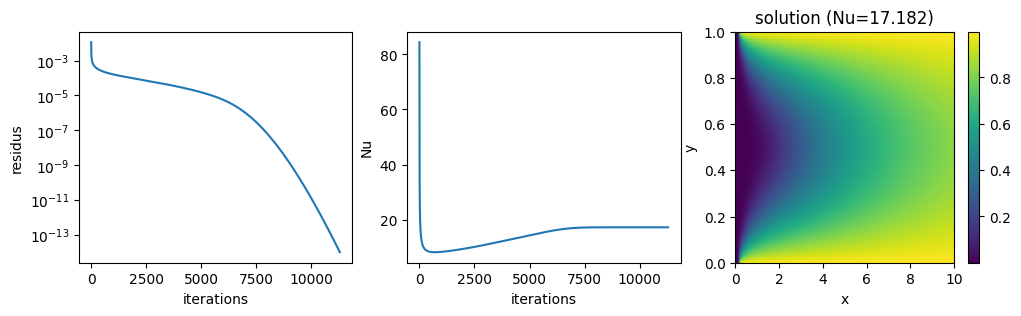

In [298]:
err, x, y, u, dy, dx, Nuf, res=canal(Nx=200,Ny=100,display=2,Pe=50,T_max=20,dt_Disp=1,L=10)



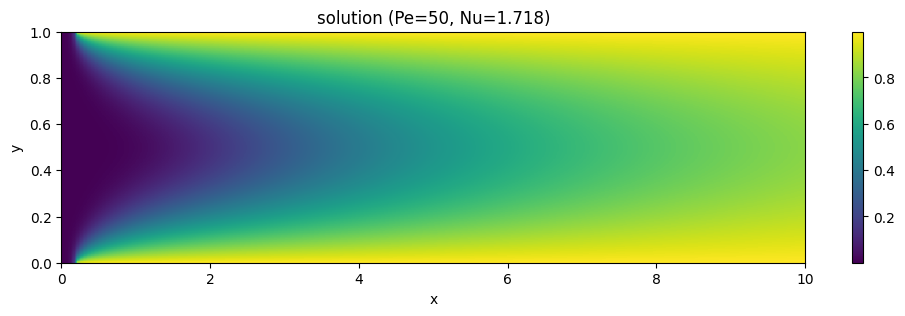

In [299]:
fig = plt.figure(1,figsize=(12,3))
ax3 = fig.add_subplot(111)
im=ax3.imshow(u.T, origin='lower',aspect='auto',extent=(0,10,0,1))
        
ax3.set_xlabel('x')
ax3.set_ylabel('y')
Nuff=Nuf/10
ax3.set_title('solution (Pe=50, Nu=%.3f)' % Nuff)
plt.colorbar(im)
plt.show()

# canal à flux imposé

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import sparse


def canal(Nx=60,Ny=30,Pe=1000,diffx=1,display=1,dt=0,dt_Disp=0.1, precision=1e-12, T_max=2, coef_stab_c=0.3, coef_stab_d=0.3,Ll=0.2,L=5,flux=1e-3):
    ### ARGUMENTS ###
    # Nx : nombre de points en x
    # Ny : nombre de points en y
    # Pe : nombre de Peclet
    # nLy : prefacteur permettant de dimensionner la taille du domaine en y : Ly = nLy/sqrt(Pe)
    # diffx : diffusion suivant x (si 1) ou non (si 0)
    # display : affichage de graphiques si display = 2, des iterations si display = 1, de rien du tout si display = 0
    # dt_Disp : pas de temps pour l'affichage des iterations
    # precision : limite en precision pour arreter la convergernce 
    # T_max : temps maximum de la simulation
    # coef_stab_c : coefficient pour la stabilité par rapport à la convection
    # coef_stab_d : coefficient pour la stabilité par rapport à la diffusion
    
    # Taille du domaine et pas d'espace

    
    Lx = L+Ll  # Longueur du domaine en x
    Ly = 1
    dx = Lx / Nx 
    dy = Ly / Ny

    #Pas de temps
    if dt==0: # pas de temps déterminé automatiquement (conditions CFL) 
        dt_c = coef_stab_c*dx
        dt_d= coef_stab_d*Pe/(1/dy**2+1/dx**2)
        if display>0 :
            print('dt_c', dt_c,'dt_d',dt_d)
        dt = min(dt_c,dt_d)
    Ndisp=int(np.ceil(dt_Disp/dt))
    Nt=round(T_max/dt)
    
    # Initialisation du maillage
    x = np.linspace(dx/2, Lx-dx/2, Nx)-Ll
    y = np.linspace(dy/2, Ly-dy/2, Ny)
    X, Y = np.meshgrid(x, y)
    u = np.zeros((Nx, Ny))
   
    #initialisation de vecteurs residus et Nusselt
    res = np.zeros(Nt)
    Nu=np.zeros(Nt)

    xplaque=np.nonzero((x>=0))[0]
    x_full=np.concatenate((np.array([0]),x[xplaque],np.array([1])))
   
    # Conditions initiales
    u[:,:] = 0

    #construction de la matrice
    if display>0:
        print('construction de la matrice')
    mat= sparse.lil_matrix((Nx*Ny, Nx*Ny)) # on utilise des matrices creuses pour ne pas avoir de problèmes de mémoire et pour gagner en temps de calcul
    source=np.zeros(int(Nx*Ny))
    for i in range(0, Nx):
        for j in range(0, Ny):
            finds=np.ravel_multi_index(np.array([[i,i,i,i+1,i-1],[j,j-1,j+1,j,j]]),(Nx,Ny),mode='clip')
            k=finds[0]
            #flux Top
            if j < Ny - 1:
                #  fTop=dx/dy/Pe*(u[i,j+1]-u[i,j]) fTop=dx/dy/Pe*(u[i,j+1]-u[i,j])
                mat[k,k] +=  -dx / dy / Pe
                mat[k,finds[2]] += dx / dy / Pe
            else:
                if x[i]>=0:
                    source[k] += flux
            #flux bottom
            if j > 0:
                # fBottom=dx/dy/Pe*(u[i,j-1]-u[i,j])
                mat[k,k] += -dx / dy / Pe
                mat[k,finds[1]] += +dx / dy / Pe
            else:
                #fBottom = 2 * dx / dy / Pe * (1 - u[i, j])
                if x[i]>=0:
                    
                    source[k] += flux
            if i > 0:
                #fLeft = dy / 2 * (u[i - 1, j] * 2) + (1 - diffx) * dy / dx / Pe * (u[i - 1, j] - u[i, j])
                mat[k,finds[4]] += dy + diffx*dy/dx/Pe
                mat[k,k] += -diffx*dy/dx/Pe
            else:  # T nul à gauche
                #fLeft = (1-diffx)*2*dy/dx/Pe*(-u[i,j])
                mat[k,k] += -diffx * 2 * dy / dx / Pe
            if i < Nx - 1:
                #fRight = -dy / 2 * (u[i, j] * 2) + (1 - diffx) * dy / dx / Pe * (u[i + 1, j] - u[i, j])
                mat[k, k] += -dy -diffx*dy/dx/Pe
                mat[k,finds[3]] += diffx*dy/dx/Pe
            else:  # flux diffusif nul
                #fRight = -dy * u[i, j]
                mat[k, k] += -dy

    mat=sparse.eye(Nx*Ny)+mat*dt/(dx*dy)
    mat=mat.tocsr() # conversion du type de matrice creuse, pour gagner en temps de calcul

    source=source*dt/(dx*dy)

    if display>0:
        print('debut des iterations')

    for n in range(0,Nt):
        # shema :
        u_new = mat.dot(u.reshape(Nx*Ny))  + source 
        #redimensionnement de la solution
        u_new=u_new.reshape((Nx,Ny))
        #calcul des résidus
        res[n]=np.mean(abs(u-u_new))
        u = u_new
        # calcul du nombre de Nusselt
        
        u0_full=np.concatenate((np.array([u[xplaque[0],0]]),u[xplaque,0],np.array([u[xplaque[-1],0]])))       
        Nu[n]=-np.trapz(2*(u0_full-1)/dy,x_full)
        #affichage des iterations
        if (display>0 and n>0 and n % Ndisp == 0):
            print('it %g, t=%g, residu=%g, Nu=%g' % (n, n*dt, res[n], Nu[n]))
        # test de la convergence
        if (n>Ndisp and abs(Nu[n]-Nu[n-1])/Nu[n]<precision):
            if display>0:
                print('Convergence is reached')
            break

    uu=1-special.erf(Y[:,xplaque]/(np.sqrt(4*X[:,xplaque]/Pe)))
    err=sum(sum(np.sqrt((uu.T-u[xplaque,:])**2)))/sum(sum(abs(uu)))
    if display>0:
        print('erreur : %g' % err)
    Nu=Nu[Nu>0]
    res=res[res>0]
    Nuf=Nu[-1]
    
    if display>1:
        fig = plt.figure(1,figsize=(12,3))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        
        
        ax1.semilogy(res)
        ax1.set_xlabel('iterations')
        ax1.set_ylabel('residus')
         
        ax2.plot(Nu)
        ax2.set_xlabel('iterations')
        ax2.set_ylabel('Nu')
    
        im=ax3.imshow(u.T, origin='lower',aspect='auto',extent=(0,L,0,Ly))
        
        ax3.set_xlabel('x')
        ax3.set_ylabel('y')
        ax3.set_title('solution (Nu=%.3f)' % Nuf)
        plt.colorbar(im)
        plt.show()

    return err, x, y, u, dy, dx, Nuf, res

dt_c 0.015299999999999998 dt_d 0.0014444650129581637
construction de la matrice
debut des iterations
it 693, t=1.00101, residu=4.99526e-05, Nu=180.26
it 1386, t=2.00203, residu=4.43934e-05, Nu=186.469
it 2079, t=3.00304, residu=3.88343e-05, Nu=201.537
it 2772, t=4.00406, residu=3.32752e-05, Nu=223.707
it 3465, t=5.00507, residu=2.7716e-05, Nu=252.842
it 4158, t=6.00609, residu=2.21569e-05, Nu=289.181
it 4851, t=7.0071, residu=1.65979e-05, Nu=332.965
it 5544, t=8.00811, residu=1.10548e-05, Nu=384.16
it 6237, t=9.00913, residu=5.82624e-06, Nu=438.899
it 6930, t=10.0101, residu=2.05382e-06, Nu=481.544
it 7623, t=11.0112, residu=4.32076e-07, Nu=500.599
it 8316, t=12.0122, residu=5.34708e-08, Nu=505.134
it 9009, t=13.0132, residu=4.07056e-09, Nu=505.732
it 9702, t=14.0142, residu=2.02985e-10, Nu=505.779
it 10395, t=15.0152, residu=7.05307e-12, Nu=505.781
it 11088, t=16.0162, residu=1.80305e-13, Nu=505.782
Convergence is reached
erreur : 0.708951


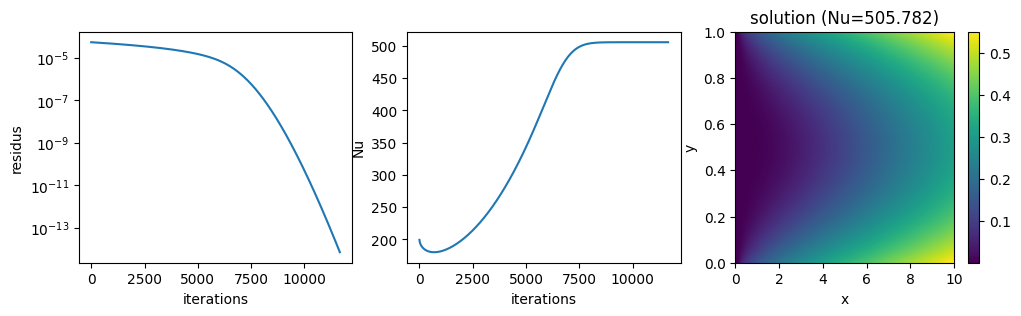

In [301]:
err, x, y, u, dy, dx, Nuf, res=canal(Nx=200,Ny=100,display=2,Pe=50,T_max=20,dt_Disp=1,L=10)

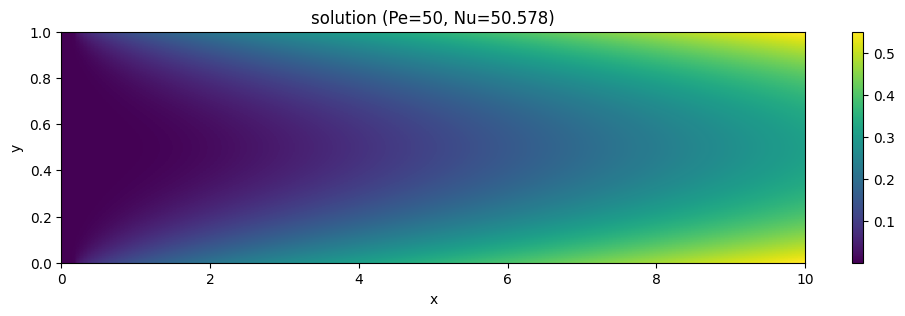

In [302]:
fig = plt.figure(1,figsize=(12,3))
ax3 = fig.add_subplot(111)
im=ax3.imshow(u.T, origin='lower',aspect='auto',extent=(0,10,0,1))
        
ax3.set_xlabel('x')
ax3.set_ylabel('y')
Nuff=Nuf/10
ax3.set_title('solution (Pe=50, Nu=%.3f)' % Nuff)
plt.colorbar(im)
plt.show()